In [2]:
pip install mamba


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ------

In [5]:
pip install python-igraph


   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.5 MB 2.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.5 MB 6.7 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.5 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 14.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install leidenalg

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.6 MB 2.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.6 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 11.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scanpy


     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
     ---------------------------------------- 0.0/90.9 kB ? eta -:--:--
     ---------------------------------------- 90.9/90.9 kB ? eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: fi

In [1]:
pip install anndata

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import numpy as np

C:\Users\Cristal\AppData\Local\Temp\ipykernel_17252\4192354749.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [191]:
import anndata

# Provide the path to your h5ad file
file_path = r"D:\Baylor\opticnerve\scmer\onhclean.h5ad"

# Load the h5ad file
adata = anndata.read_h5ad(file_path)


In [192]:
adata

AnnData object with n_obs × n_vars = 300097 × 36601
    obs: 'donor', 'gender', 'age', 'ethnicity', 'sampleid', 'leiden'
    obsm: 'X_scVI', 'X_umap'

In [6]:
import matplotlib.pyplot as plt

In [7]:
adata.obs

,donor,gender,age,ethnicity,sampleid,leiden
0,MMD_23_4840,male,15,black,MMD_23_4840_ONH,2
1,MMD_23_4840,male,15,black,MMD_23_4840_ONH,4
2,MMD_23_4840,male,15,black,MMD_23_4840_ONH,2
3,MMD_23_4840,male,15,black,MMD_23_4840_ONH,1
4,MMD_23_4840,male,15,black,MMD_23_4840_ONH,13
...,...,...,...,...,...,...
1124-30,BCM_23_0574,female,46,white,23_0574_ONH_bead,38
1125-30,BCM_23_0574,female,46,white,23_0574_ONH_bead,10
1126-30,BCM_23_0574,female,46,white,23_0574_ONH_bead,17
1127-30,BCM_23_0574,female,46,white,23_0574_ONH_bead,11


In [181]:
# Assuming you have a 'sample_id' annotation in your obsm, replace 'your_sample_id' with the ID you're interested in
sample_id = '23_0574_ONH_bead'

In [182]:
# 1. Subset the AnnData object to include only the cells from the specified sample ID
adata_subset = adata[adata.obs['sampleid'] == sample_id, :]

In [183]:
adata_subset

View of AnnData object with n_obs × n_vars = 1129 × 36601
    obs: 'donor', 'gender', 'age', 'ethnicity', 'sampleid', 'leiden'
    uns: 'leiden_colors', 'sampleid_colors'
    obsm: 'X_scVI', 'X_umap'

In [184]:
# 2. Compute the proportions of cells in each cluster
cluster_proportions = adata_subset.obs['leiden'].value_counts(normalize=True)

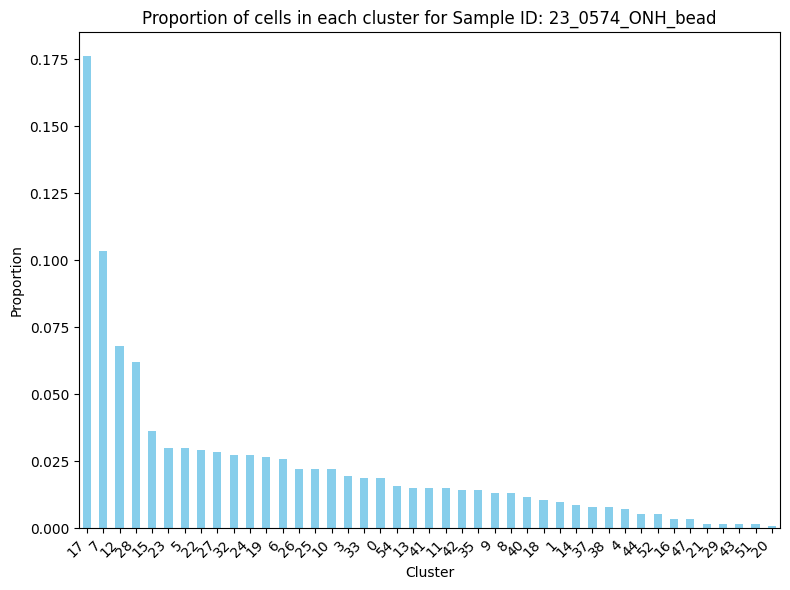

In [185]:
# 3. Plot the proportions
plt.figure(figsize=(8, 6))
cluster_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of cells in each cluster for Sample ID: {}'.format(sample_id))
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# List all different items in the 'sampleid' column
unique_sample_ids = adata.obs['sampleid'].unique()

print("Unique sample IDs:")
print(unique_sample_ids)

Unique sample IDs:
['MMD_23_4840_ONH', 'MMD_D009_13_ONH', 'MMD_23_5480_ONH', 'MMD_23_5460', 'MMD_19_D008_ONH', ..., '22_0849_ONH', '22_0434_ONH_Nu', '22_0769_ONH', '23_0792_ONH_bead', '23_0574_ONH_bead']
Length: 32
Categories (32, object): ['MMD_23_4840_ONH', 'MMD_D009_13_ONH', 'MMD_23_5480_ONH', 'MMD_23_5460', ..., '22_0434_ONH_Nu', '22_0769_ONH', '23_0792_ONH_bead', '23_0574_ONH_bead']


C:\Users\Cristal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Cristal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\Cristal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  col

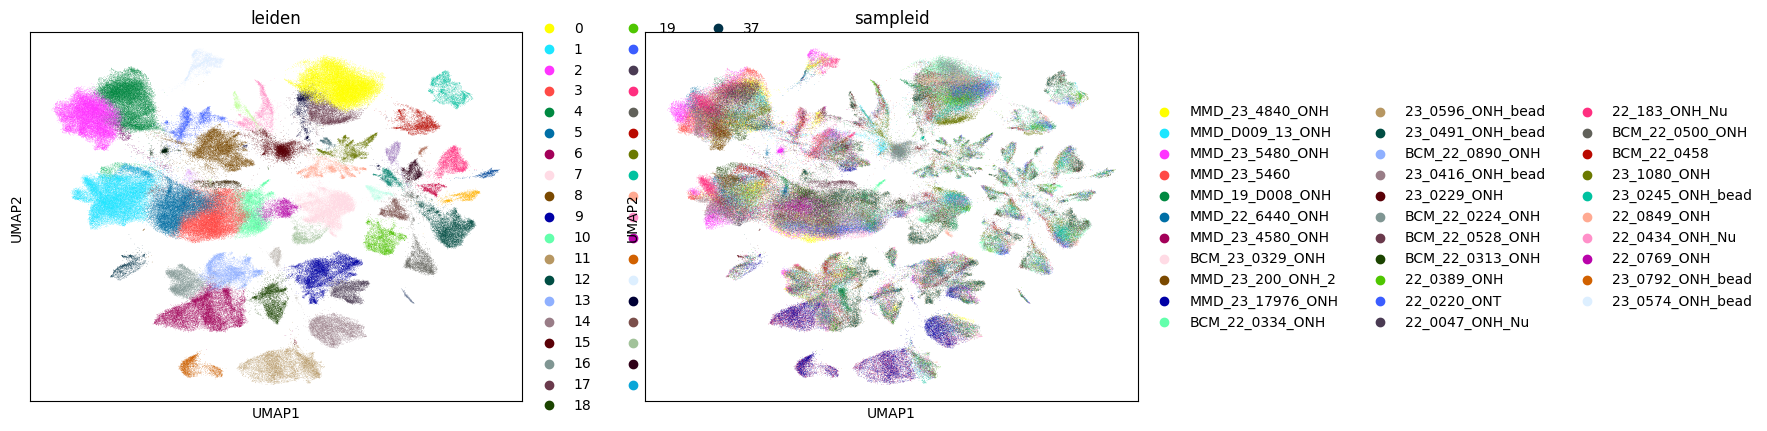

In [194]:
sc.pl.umap(adata, color=['leiden', 'sampleid'])

C:\Users\Cristal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Cristal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\Cristal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  col

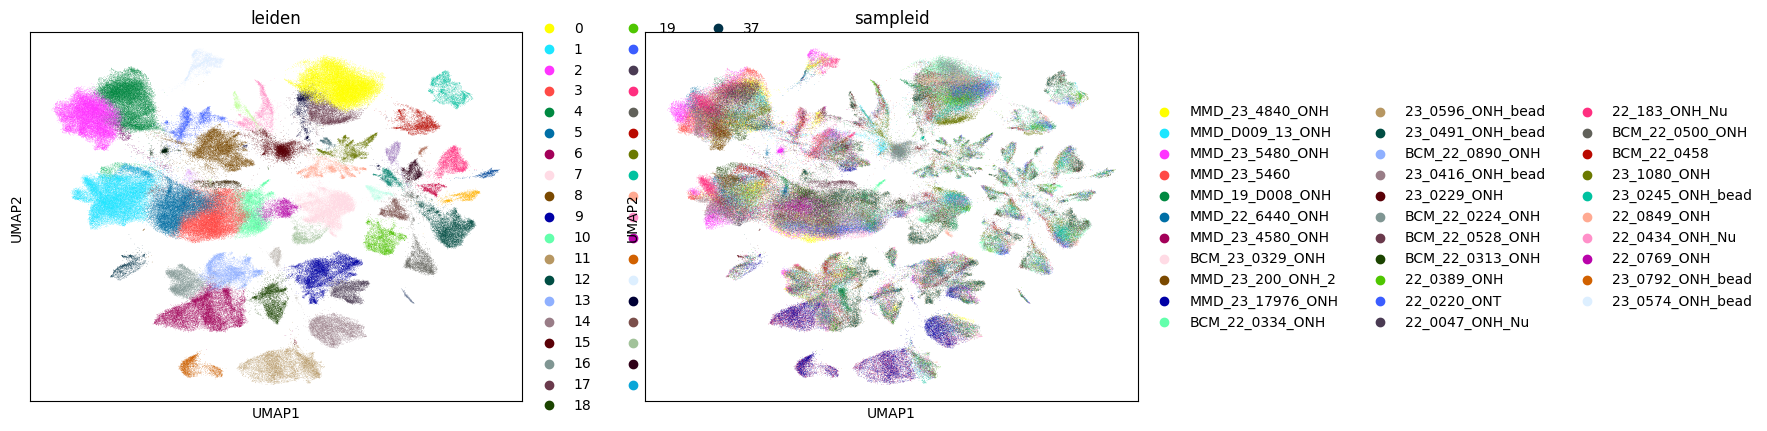

C:\Users\Cristal\AppData\Local\Temp\ipykernel_12916\3106746166.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_cluster_counts = adata.obs.groupby(['sampleid', 'leiden']).size().unstack(fill_value=0)


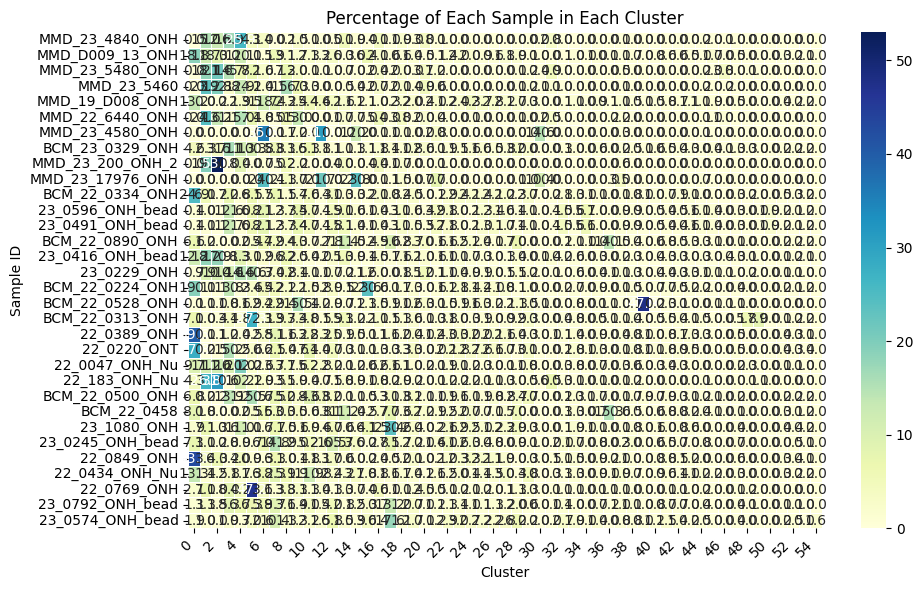

In [19]:


# Assuming you have already loaded your AnnData object 'adata'

# Define the UMAP visualization with the color set to both 'leiden' and 'sampleid'
sc.pl.umap(adata, color=['leiden', 'sampleid'])

# Get the counts of cells for each sample ID and cluster
sample_cluster_counts = adata.obs.groupby(['sampleid', 'leiden']).size().unstack(fill_value=0)

# Calculate the percentage of each sample in each cluster
sample_cluster_percentage = sample_cluster_counts.div(sample_cluster_counts.sum(axis=1), axis=0) * 100

# Visualize the percentage of each sample in each cluster
plt.figure(figsize=(10, 6))
sns.heatmap(sample_cluster_percentage, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('Percentage of Each Sample in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sample ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Save the DataFrame to a CSV file
sample_cluster_percentage.to_csv('sample_cluster_percentage.csv')

In [49]:
unique_sample_idsdf= pd.DataFrame(unique_sample_ids)


In [50]:
unique_sample_idsdf.to_csv('onhids.csv')

C:\Users\Cristal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Cristal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\Cristal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  col

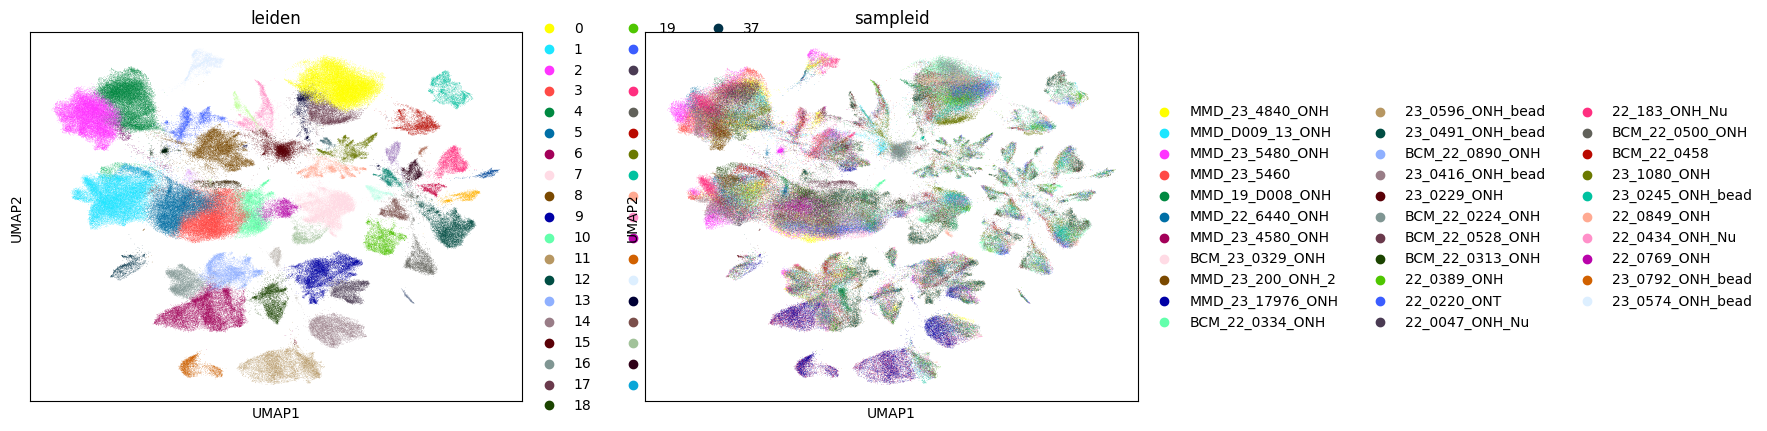

In [195]:
sc.pl.umap(adata, color=['leiden', 'sampleid'])

In [5]:
# Provide the path to your h5ad file
file_path = r"D:\Baylor\opticnerve\scmer\onhclean.h5ad"

# Load the h5ad file
onh = anndata.read_h5ad(file_path)

In [6]:
onh.obs

,donor,gender,age,ethnicity,sampleid,leiden
0,MMD_23_4840,male,15,black,MMD_23_4840_ONH,2
1,MMD_23_4840,male,15,black,MMD_23_4840_ONH,4
2,MMD_23_4840,male,15,black,MMD_23_4840_ONH,2
3,MMD_23_4840,male,15,black,MMD_23_4840_ONH,1
4,MMD_23_4840,male,15,black,MMD_23_4840_ONH,13
...,...,...,...,...,...,...
1124-30,BCM_23_0574,female,46,white,23_0574_ONH_bead,38
1125-30,BCM_23_0574,female,46,white,23_0574_ONH_bead,10
1126-30,BCM_23_0574,female,46,white,23_0574_ONH_bead,17
1127-30,BCM_23_0574,female,46,white,23_0574_ONH_bead,11


In [7]:
# Provide the path to your h5ad file
file_path = r"D:\Baylor\opticnerve\ONH\sanes.h5ad"

# Load the h5ad file
sanes = anndata.read_h5ad(file_path)

In [210]:
sanes.obs

,sampleid,leiden
0,Hu105916,16
1,Hu105916,5
2,Hu105916,1
3,Hu105916,6
4,Hu105916,2
...,...,...
8157-4,Hu0218,2
8158-4,Hu0218,2
8159-4,Hu0218,2
8160-4,Hu0218,26


In [200]:
var_names = onh.var_names.intersection(sanes.var_names)
onh = onh[:, var_names]
sanes = sanes[:, var_names]

In [9]:
sc.pp.pca(onh)
sc.pp.neighbors(onh)
sc.tl.umap(onh)

C:\Users\Cristal\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyError: 'Could not find key louvain in .var_names or .obs.columns.'

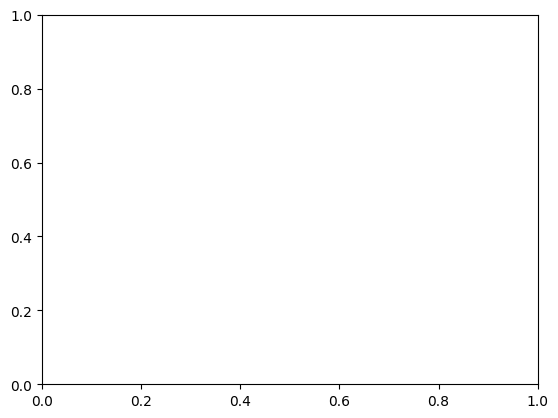

In [10]:
sc.pl.umap(onh, color='louvain')


In [8]:
sc.tl.ingest(sanes, onh, obs='louvain')


ValueError: There is no neighbors data in `adata.uns["neighbors"]`.
Please run pp.neighbors.

In [1]:
sanes.uns['louvain_colors'] = onh.uns['louvain_colors']  # fix colors


NameError: name 'onh' is not defined

In [11]:
adata_concat = onh.concatenate(sanes, batch_categories=['onh', 'sanes'])


C:\Users\Cristal\AppData\Local\Temp\ipykernel_17252\4150671062.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = onh.concatenate(sanes, batch_categories=['onh', 'sanes'])


In [12]:
adata_concat.obs.louvain = adata_concat.obs.louvain.astype('category')
adata_concat.obs.louvain.cat.reorder_categories(onh.obs.louvain.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['louvain_colors'] = onh.uns['louvain_colors']  # fix category colors

AttributeError: 'DataFrame' object has no attribute 'louvain'

In [ ]:
sc.pl.umap(adata_concat, color=['batch', 'louvain'])
